<a href="https://colab.research.google.com/github/CoderNitu/MNIST-Handwritten-Digit-Clssification-using-Deep-Learning/blob/main/MNIST_Handwritten_Digit_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the MNIST dataset:**

---> It consists of 60,000 images with 28X28 dimension and 10,000 test image data. It is a type of grascale images and the image processing and cross vlidation part is already done in this dataset.    

**Importing the Dependencies:(Libraries)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the data from keras.datasets:**

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

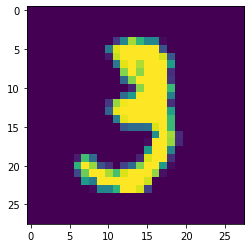

3


In [6]:
# display the image fromm numpy array using matoltlib library:
plt.imshow(X_train[10])
plt.show()

# printing the corresponding label of the image
print(Y_train[10])

In [7]:
# display the image from numpy array using OpenCV Library:

cv2_imshow(X_train[10])

# printing the corresponding lebel to the image

print(Y_train[10])

3


**Image Label analysis:**

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


We can use the labels like this or we can also use One Hot Encoding

In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling (Normalization) the values:
X_train = X_train/255
X_test = X_test/255

**Building the Nueral Network using Tensorflow and Keras:**

In [11]:
# Setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [12]:
# compiling the neral network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']     
)


In [13]:
# training the neural network
model.fit(X_train,Y_train,epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Accuracy on our trining data = 98.8%

**Model Evaluation: (accuracy on test data to check if our neral network is overfitted or not.**

In [14]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9699
0.9699000120162964


Accuracy on our testing data=96.8%

In [15]:
print(X_test.shape)

(10000, 28, 28)


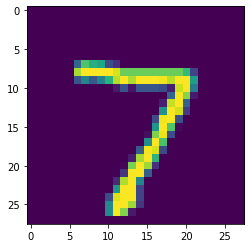

7


In [16]:
# display image using matplotlib library
plt.imshow(X_test[0])
plt.show()

# print the cooresponding lebel
print(Y_test[0])

In [17]:
# display image using OpenCV library
cv2_imshow(X_test[5])

# print the cooresponding lebel
print(Y_test[5])

1


In [18]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


In case of ML, model.predict() will give us the labels directly. But, in DL, model.predict() gives the predictions probability of each class(labels) for that data point

In [21]:
# converting the prediction probabilities to class label
label_for_first_test_img = np.argmax(Y_pred[0])
print(label_for_first_test_img)

7


In [22]:
print(Y_pred)

[[1.4374391e-03 7.1467441e-01 6.1776555e-01 ... 9.9999857e-01
  9.5946109e-03 6.5481454e-02]
 [8.1591361e-04 9.5978367e-01 9.9999821e-01 ... 6.6343847e-10
  9.9698234e-01 2.4737842e-10]
 [1.9989147e-04 9.9912643e-01 1.5698049e-02 ... 3.1495817e-02
  8.1338865e-01 6.1804242e-03]
 ...
 [1.2322161e-06 1.2402907e-05 1.5628220e-05 ... 2.8683720e-02
  1.9138683e-02 1.2131246e-01]
 [6.1268125e-05 4.1996685e-05 1.0411598e-03 ... 5.1167603e-03
  9.9609858e-01 2.2034357e-04]
 [4.6744933e-03 1.5611018e-03 5.0850030e-02 ... 2.5132761e-07
  9.7440073e-04 2.5022175e-11]]


In [23]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test ---> actual/true labels of our test data

Y_pred_labels ----> predicted labels of our test data

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels) 

In [26]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    1    2    2    3    0]
 [   0 1122    0    3    0    3    2    1    4    0]
 [   5    1  983    7    8    2    5    8   13    0]
 [   0    0    2  972    0   25    0    3    4    4]
 [   1    0    2    0  965    3    5    1    1    4]
 [   2    0    0    4    1  879    3    1    2    0]
 [   5    3    0    1    4   10  932    0    3    0]
 [   1    7    6    1    5    0    0  995    7    6]
 [   2    0    1    6    4   14    2    3  939    3]
 [   2    4    0    6   26   11    2    6    9  943]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

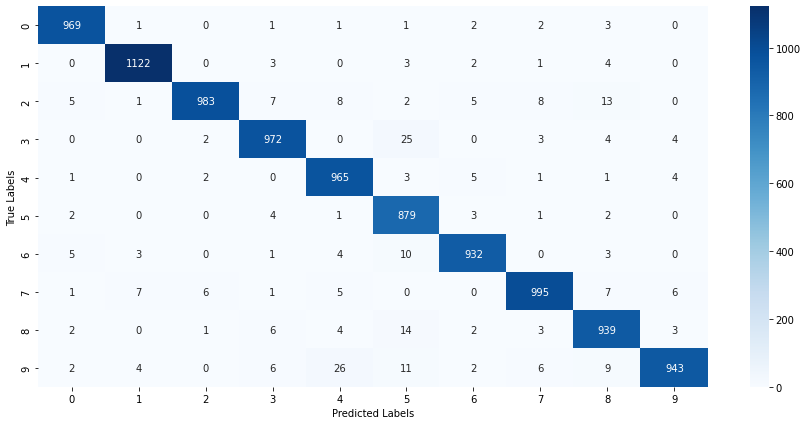

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System:**

In [29]:
input_img_path ='/content/MNIST_img.jpg'
input_img = cv2.imread(input_img_path)

In [30]:
type(input_img)

numpy.ndarray

In [31]:
print(input_img)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


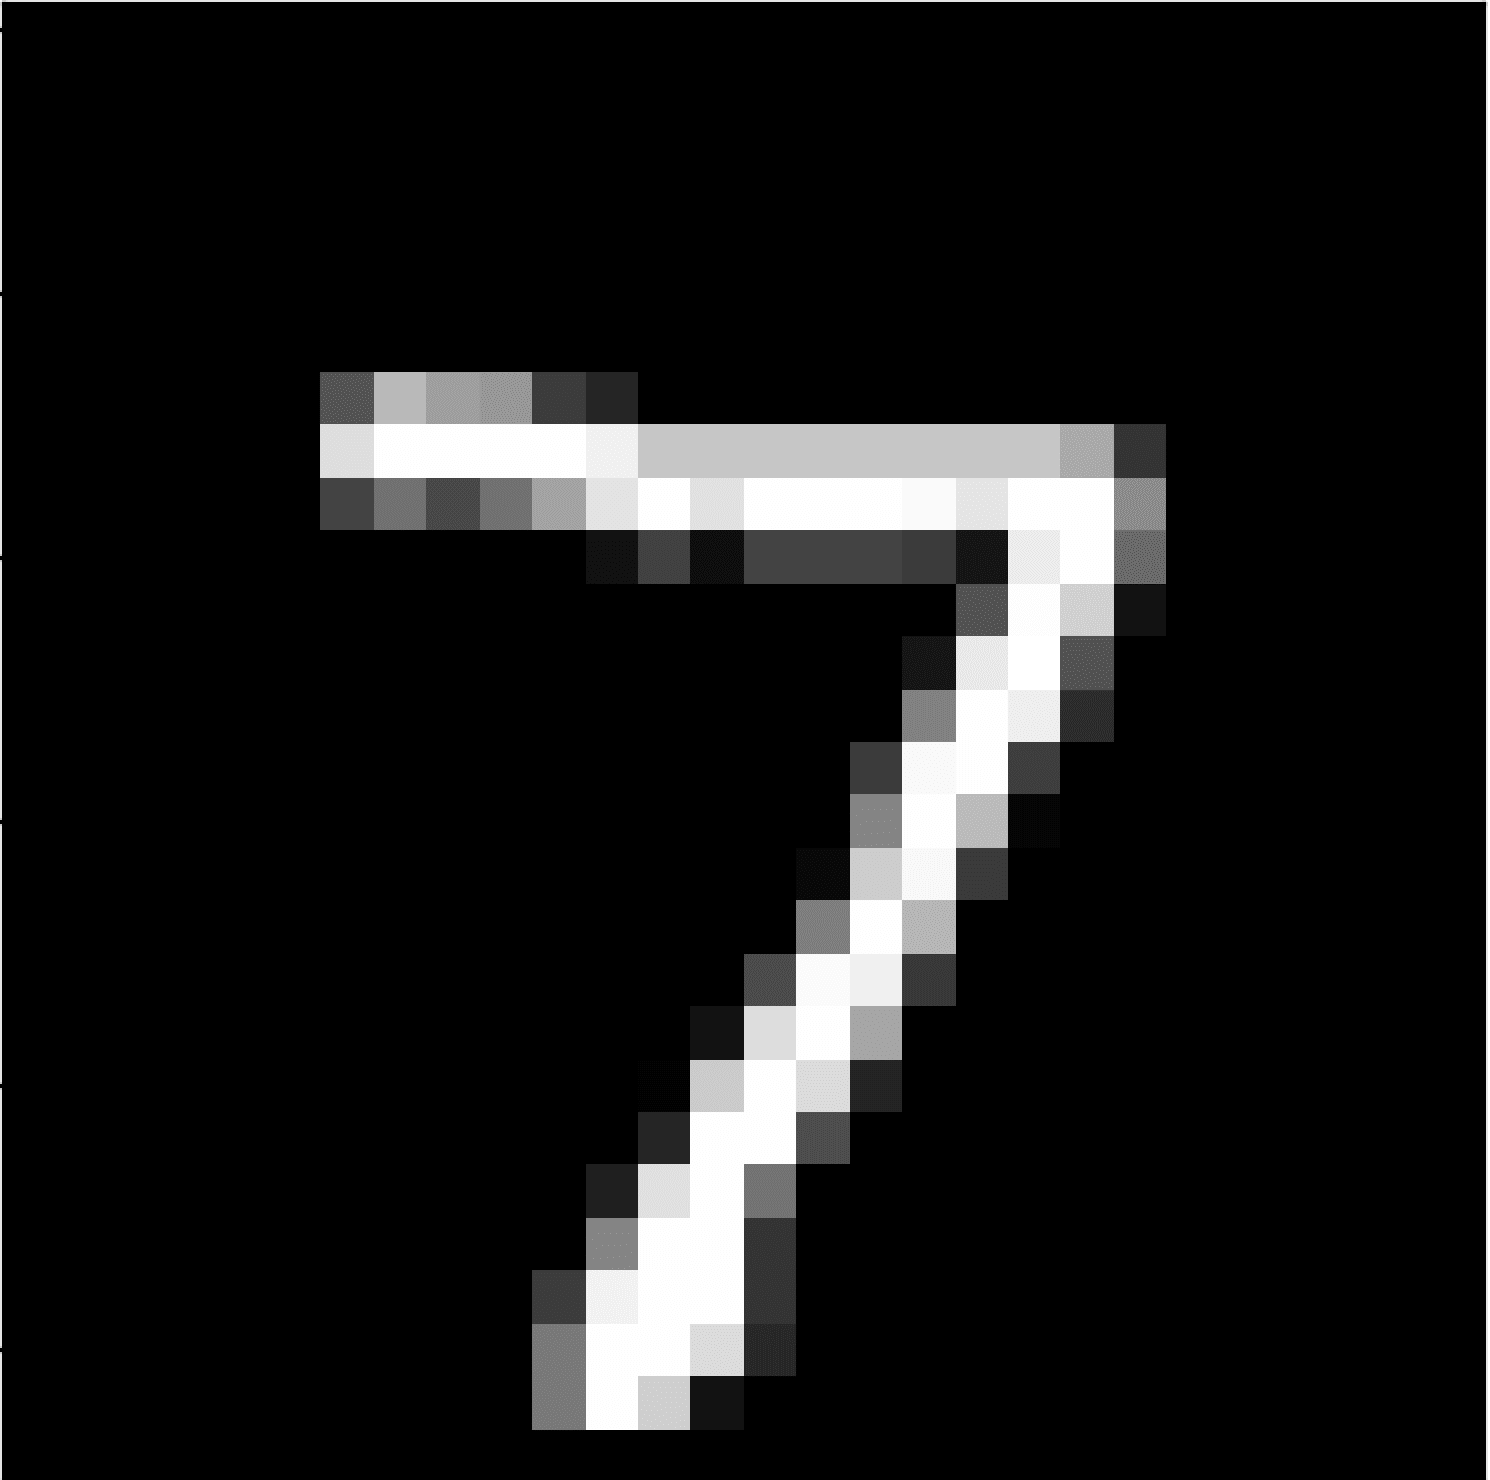

In [32]:
# display/ visualize the image
cv2_imshow(input_img)

In [33]:
print(input_img.shape)

(1480, 1490, 3)


In [34]:
#converting into grayscale image
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(1480, 1490)

In [36]:
# resizing the image using OpenCV library
img_resize = cv2.resize(grayscale, (28,28))

In [37]:
print(img_resize.shape)

(28, 28)


In [38]:
cv2_imshow(img_resize)

In [39]:
#Scaling the image
input_img_scaled = img_resize/255

In [41]:
print(input_img_scaled)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
img_reshape = np.reshape(input_img_scaled,[1,28,28])

In [44]:
input_prediction = model.predict(img_reshape)
print(input_prediction)

1/1 [==============================] - 0s 36ms/step
[[1.4484250e-03 7.1244264e-01 6.1776644e-01 6.3642043e-01 1.2496936e-04
  9.0728817e-04 1.1457752e-08 9.9999851e-01 9.7479494e-03 6.7484729e-02]]


In [45]:
# converting prediction probabilty of the image to class label
pred_img_label = np.argmax(input_prediction)
print(pred_img_label)

7


**Presictive System:**

Path of the image to be predicted: /content/MNIST_img.jpg


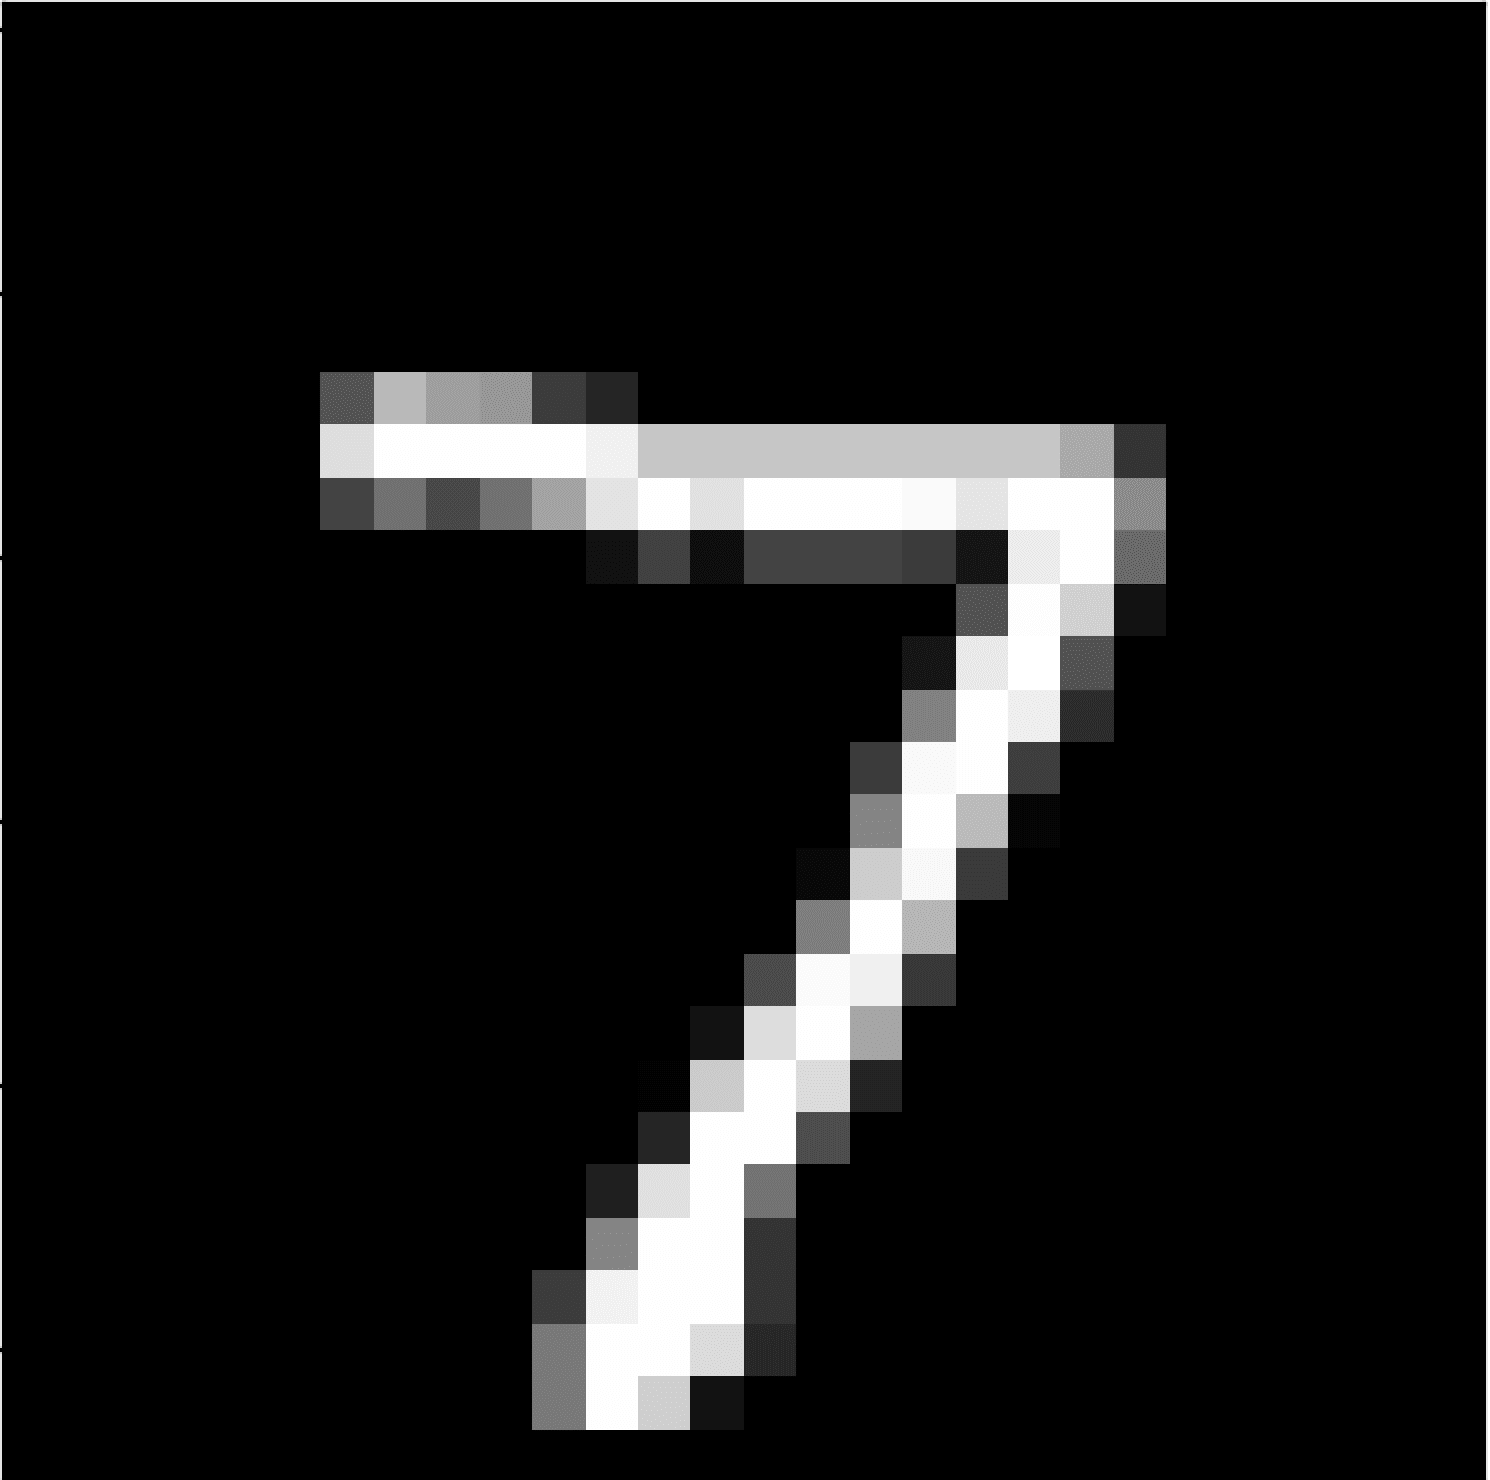

1/1 [==============================] - 0s 17ms/step
The Handwritten image is recognised as:  7


In [46]:
nput_img_path =input('Path of the image to be predicted: ')

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

img_resize = cv2.resize(grayscale, (28,28))

input_img_scaled = img_resize/255

img_reshape = np.reshape(input_img_scaled,[1,28,28])

input_prediction = model.predict(img_reshape)

pred_img_label = np.argmax(input_prediction)

print('The Handwritten image is recognised as: ',pred_img_label)